In [209]:
import matplotlib.pyplot as plt
import numpy as np

In [210]:
def phiH(x, y, k, h):
    '''Our potential function for the finite depth case for the real part of phi hat'''
    
    return np.cosh(k*(y+h))*np.exp(1j*k*x)

In [211]:
def omega_squared(k, h):
    '''This function returns omega from the dispersion relation'''
    g = 9.8
    return k*g*np.tanh(k*h)

In [1139]:
def y_lower_boundry(matrix, om, omg, k, dx, dy, i, j):
    """This is a function for the lower boundary for y"""
    
    return (2/3)*(2*matrix[i+1, j] -  0.5*matrix[i+2, j])

def x_left_boundary(matrix, om, omg, k, dx, dy, i, j):
    """This is a function for the left boundary of x"""

    return (1/((3/2)))*(2*matrix[i, j+1] - 0.5*matrix[i, j+2])
    
def x_right_boundary(matrix, om, omg, k, dx, dy, i, j):
    """This is a function for the right boundary of x"""

    return (1/((3/2)))*(2*matrix[i, j-1] - 0.5*matrix[i, j-2])

def Laplace(matrix, om, omg, k, dx, dy, i, j):
    """Central Difference for laplaces equation"""

    return ((dy**2)*(matrix[i, j+1] + matrix[i, j-1]) + (dx**2)*(matrix[i+1, j] + matrix[i-1, j]))*(1/(2*(dx**2) + 2*(dy**2)))


def y_upper_boundary(matrix, om, omg, k, dx, dy, i, j,x):
    """The upper y boundary function"""
    return (2*matrix[i-1, j] - 0.5*matrix[i-2, j])*(1/( 1.5 - omg*dy))

def y_raft_boundary(matrix,om,omg, k, dx, dy, i, j, intmiddle, pitch, heav, x):
    """The upper y raft boundary function"""
    return (dy*om*1j*(heav + pitch*(x[j] - x[intmiddle])) + 2*matrix[i-1, j] - 0.5*matrix[i-2, j])*(2/3)

0.679821686211994

# Finite difference with Fixed Boundaries Comparison to analytical solution:

In [483]:
N = 100
M = 100
L1 = 2
h1 = 1
g = 9.8
x_new = np.linspace(-L1, L1, N)
y_new = np.linspace(-h1, 0, M)
dx = 2*L1/(N-1)
dy = h1/(M-1)
k1 = 4*np.pi/(2*L1)
om = np.sqrt(k1*g*np.tanh(k1*h1))
omg = (om**2)/g
X_new, Y_new = np.meshgrid(x_new, y_new)
Hat = phiH(X_new, Y_new, k1, h1)
dx

0.04040404040404041

In [1205]:
k1 = 4*np.pi/(2*L1)
N = 100
M = 100
L1 = 2
h1 = 1
g = 9.81
Hat = phiH(X_new, Y_new, k1, h1)
x_new = np.linspace(-L1, L1, N)
y_new = np.linspace(-h1, 0, M)
X_new, Y_new = np.meshgrid(x_new, y_new)
dx = 2*L1/(N-1)
dy = h1/(M-1)
dx**3 + dy**3

6.698965988834371e-05

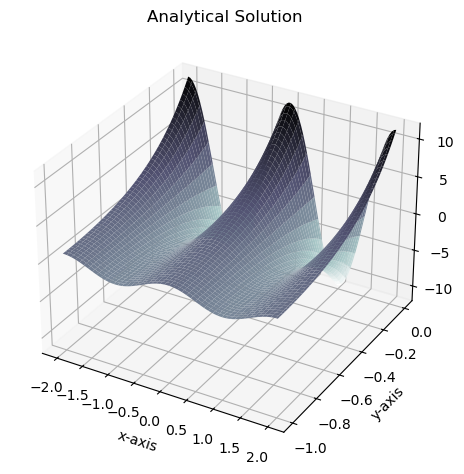

In [1199]:
fig = plt.figure()
ax = plt.axes(projection='3d')
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title("Analytical Solution")
plt.grid(True)
plt.tight_layout()
ax.plot_surface(X_new, Y_new, Hat, cmap = 'bone_r')
plt.savefig('Analytical_3D', bbox_inches='tight')

In [62]:
P = np.zeros((M, N), dtype=complex)
P[0,:] = Hat[0,:]
P[-1,:] = Hat[-1,:]
P[:,0] = Hat[:, 0]
P[:,-1] = Hat[:, -1]

In [63]:
conv_vs_analytical = []
conv = []

In [64]:
iterations = 1000000
tolerance = 0.00001  # the tolerance

for t in range(iterations):
    P_old = P.copy()  # Create a copy of the current solution

    #writing loop below:
    for i in range(1, M-1):
        for j in range(0, N-1):
            P[i, j] = Laplace(P, om, omg, k1, dx, dy, i, j)

  

    # Check for convergence
    diff = np.max(np.abs(P - P_old))
    diff2 = np.max(np.abs(P - Hat))
    conv_vs_analytical.append(diff2)
    conv.append(diff)
    if (diff < tolerance):
        print(f"Converged after {t+1} iterations.")
        break
    if t == 10:
        g1 = P.copy()
    elif t == 100:
        g2 = P.copy()
    elif t == 1000:
        g3 = P.copy()

Converged after 4185 iterations.


In [81]:
conv_fd1 = conv

In [85]:
convA_fd1 = conv_vs_analytical

In [1215]:
convA_fd1

[10.881856865321932,
 10.543423014066933,
 10.215607277983063,
 9.898079519008332,
 9.590519959940377,
 9.440198252595518,
 9.219760778114155,
 9.084573510366738,
 8.909486885952914,
 8.786967975277054,
 8.65729110442089,
 8.520131219173486,
 8.422550298264646,
 8.31417199520882,
 8.198303437910914,
 8.113573696450834,
 8.024730563718364,
 7.931284308459493,
 7.841826782222268,
 7.768824908979778,
 7.692616984214024,
 7.61398757411986,
 7.534618333589878,
 7.471799624093032,
 7.407054365772301,
 7.340809943818914,
 7.273438891926098,
 7.209045779890975,
 7.15389202271517,
 7.097691818168948,
 7.040672806736135,
 6.983036577191354,
 6.92496096247391,
 6.875717608682535,
 6.827020877294294,
 6.777812250546566,
 6.728212209259271,
 6.678328771779214,
 6.628258546836287,
 6.584893550708414,
 6.542173434715618,
 6.49917266347734,
 6.455961764677686,
 6.41260473571275,
 6.3691595461361095,
 6.326901506828787,
 6.2893543981135345,
 6.251634978149089,
 6.213787907457185,
 6.175854151308676,
 6

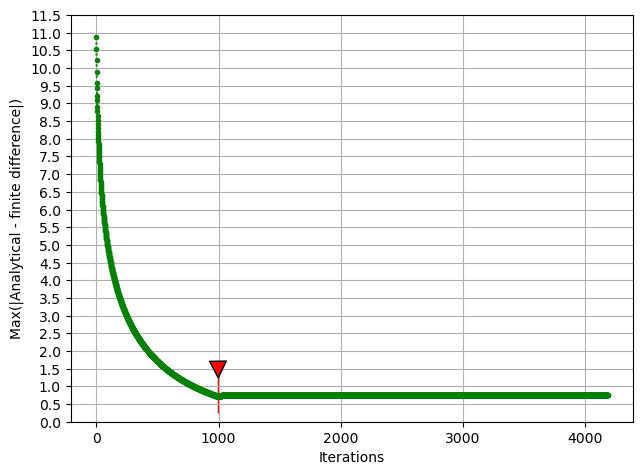

In [1220]:
plt.plot(convA_fd1, color='green', linestyle=':', marker='o', markersize=3, label='Convergence')
plt.grid(True)
plt.ylabel("Max(|Analytical - finite difference|)")
plt.xlabel("Iterations")
plt.tight_layout()

index_of_interest = 1000
plt.annotate('', xy=(index_of_interest, convA_fd1[index_of_interest]), xytext=(index_of_interest-5, convA_fd1[index_of_interest]+1),
             arrowprops=dict(facecolor='green', shrink=0.5, connectionstyle="arc3"),)
circle = plt.Circle((index_of_interest, convA_fd1[index_of_interest]), 0.5, color='red', fill=False)
plt.gca().add_patch(circle)
plt.yticks(np.arange(0, max(convA_fd1)+1, step=0.5)) 
plt.savefig('FD_Analytical_convergence1.png', bbox_inches='tight')

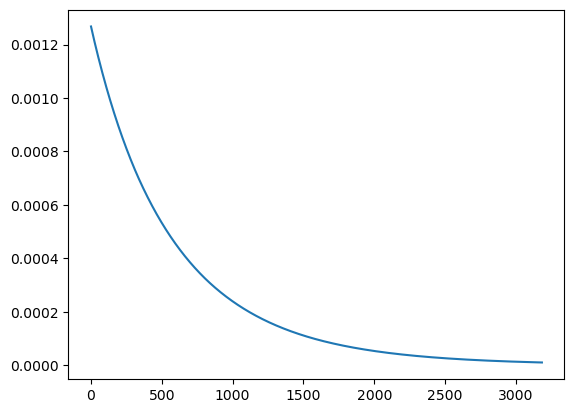

In [497]:
plt.plot(conv[1000:])

In [1188]:
g1.shape

(100, 100)

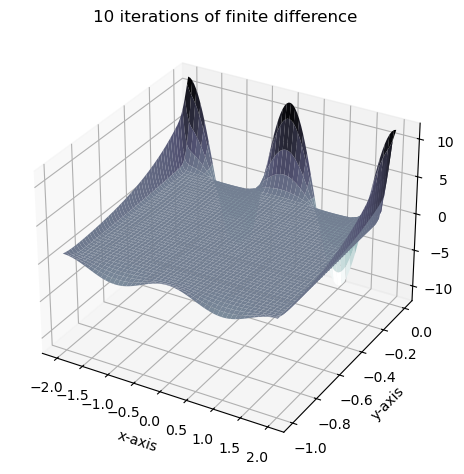

In [1192]:
fig = plt.figure()
ax = plt.axes(projection='3d')
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title("10 iterations of finite difference")
ax.plot_surface(X_new, Y_new, g1, cmap = 'bone_r')
plt.tight_layout()
plt.savefig('10_it', bbox_inches='tight')

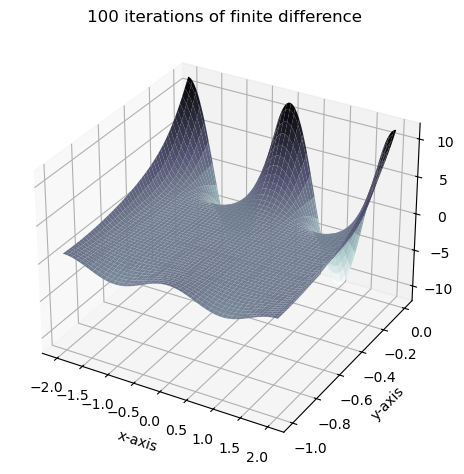

In [1193]:
fig = plt.figure()
ax = plt.axes(projection='3d')
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title("100 iterations of finite difference")
ax.plot_surface(X_new, Y_new, g2, cmap = 'bone_r')
plt.tight_layout()
plt.savefig('100_it', bbox_inches='tight')

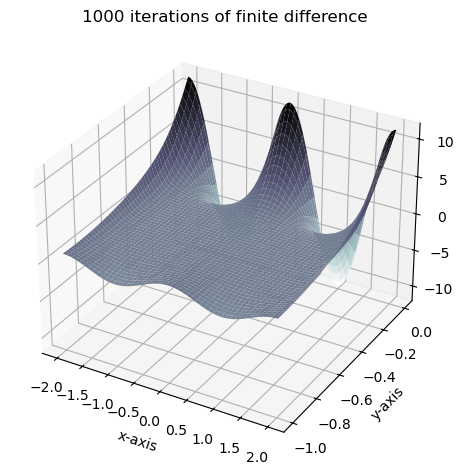

In [1194]:
fig = plt.figure()
ax = plt.axes(projection='3d')

plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title("1000 iterations of finite difference")
ax.plot_surface(X_new, Y_new, g2, cmap = 'bone_r')
plt.tight_layout()
plt.savefig('1000_it', bbox_inches='tight')

In [91]:
FD_1 = P.copy()

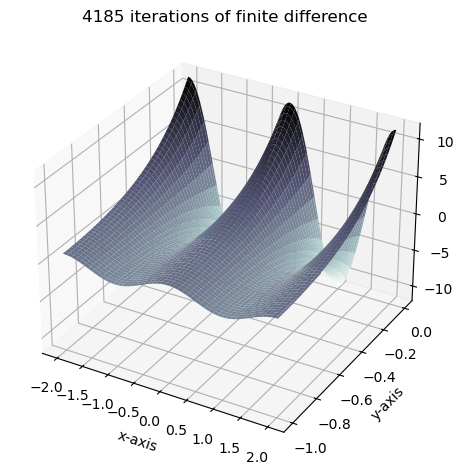

In [1195]:
fig = plt.figure()
ax = plt.axes(projection='3d')
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title("4185 iterations of finite difference")
ax.plot_surface(X_new, Y_new, FD_1, cmap = 'bone_r')
plt.tight_layout()
plt.savefig('4185_it', bbox_inches='tight')

# FD Analytical using boundary conditions:

In [1227]:
N = 400
M = 70
L1 = 3
h1 = 1
g = 9.8
x = np.linspace(-L1, L1, N)
y = np.linspace(-h1, 0, M)
dx = np.abs(x[0] - x[-1])/len(x)
dy = np.abs(y[0] - y[-1])/len(y)
k1 = 4*np.pi/(2*L1)
om = np.sqrt(k1*g*np.tanh(k1*h1))
osg = (om**2)/g
omg = osg
X_new, Y_new = np.meshgrid(x, y)
Hat = phiH(X_new, Y_new, k1, h1)
dy*omg


0.02902603685378425

In [1228]:
N = 400
M = 70
L1 = 3
h1 = 1
g = 9.8
x = np.linspace(-L1, L1, N)
y = np.linspace(-h1, 0, M)
dx = np.abs(x[0] - x[-1])/len(x)
dy = np.abs(y[0] - y[-1])/len(y)
k1 = 4*np.pi/(2*L1)

In [1229]:
P1 = np.zeros((M,N), dtype=complex)
P1[:,:] = np.real(Hat[:,:])
Hatinv = np.flip(np.real(Hat.copy()), axis=0)

In [1230]:
conv_vs_analytical1 = []
conv1 = []
saved_matrices = {}

In [1231]:
iterations = 5000
tolerance = 0.00001  # the tolerance

for t in range(iterations):
    P1_old = P1.copy()  # Create a copy of the current solution

    #writing loop below:
    for i in range(1, M - 1):
        for j in range(1, N - 1):
            c = i
            d = j
            P1[i, j] =  Laplace(P1, om, omg, k1, dx, dy, c, d)

    for i in range(M):
        b = i
        P1[i, 0] = x_left_boundary(P1, om, omg, k1, dx, dy, b, 0)
        P1[i, N - 1] =  x_right_boundary(P1, om, omg, k1, dx, dy, b, N-1)

    for j in range(1, N ):
        a = j
        P1[M-1, j] = y_upper_boundary(P1, om, omg, k1, dx, dy, M-1, a,x)
        P1[0, j] = y_lower_boundry(P1, om, omg, k1, dx, dy, 0, a)




            

  

    # Check for convergence
    diff = np.max(np.abs(P1 - P1_old))
    diff2 = np.max(np.abs(P1 -Hat))
    conv_vs_analytical1.append(diff2)
    conv1.append(diff)
    if (diff < tolerance):
        print(f"Converged after {t+1} iterations.")
        break
    elif (t+1)%200 == 0:
        saved_matrices[t + 1] = P1.copy()
        
    

Converged after 845 iterations.


In [1075]:
diff

0.019601126757171062

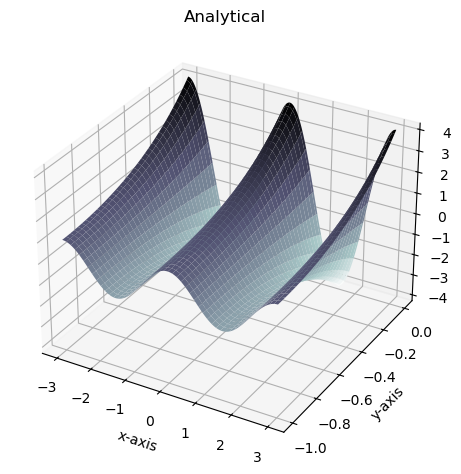

In [1222]:
fig = plt.figure()
ax = plt.axes(projection='3d')
plt.title("Analytical")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
ax.plot_surface(X_new, Y_new, np.real(Hat), cmap = 'bone_r')
plt.tight_layout()
plt.savefig('Analytical Neumann', bbox_inches='tight')

C:\Users\Aaron\anaconda3\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


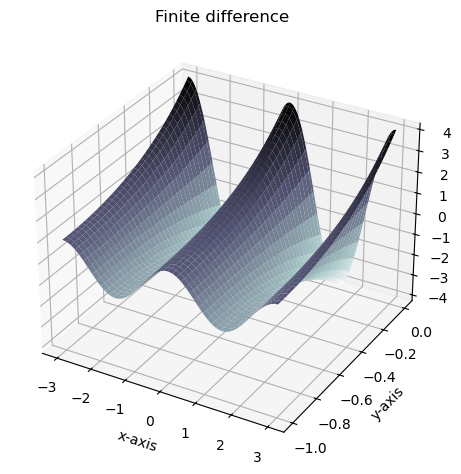

In [1223]:
fig = plt.figure()
ax = plt.axes(projection='3d')
plt.title("Finite difference ")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
ax.plot_surface(X_new, Y_new, P1, cmap = 'bone_r')
plt.tight_layout()
plt.savefig('Neumann FD', bbox_inches='tight')

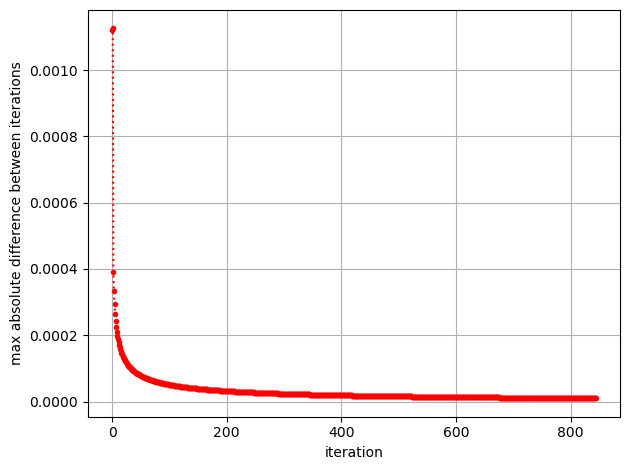

In [1244]:
plt.plot(conv1, color='red', linestyle=':', marker='o', markersize=3, label='Convergence')
plt.grid(True)
plt.xlabel("iteration")
plt.ylabel("max absolute difference between iterations")
plt.tight_layout()
plt.savefig('FDconv1.png', bbox_inches='tight')

In [1077]:
error = np.abs((P1 - np.real(Hat)))

In [1078]:
np.mean(error)

10.211327472345193

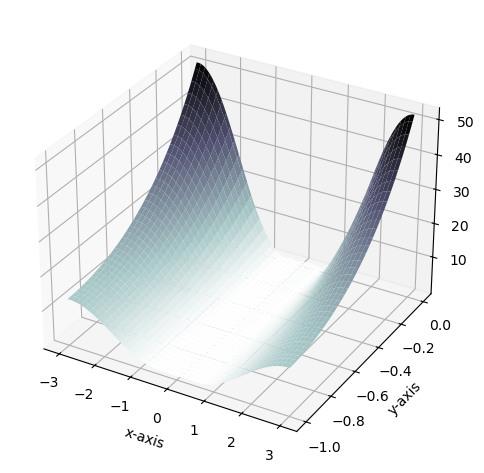

In [1079]:
fig = plt.figure()
ax = plt.axes(projection='3d')
plt.xlabel("x-axis")
plt.ylabel("y-axis")
ax.plot_surface(X_new, Y_new, error, cmap = 'bone_r')
plt.tight_layout()
plt.savefig('Neumann Error', bbox_inches='tight')

# Plotting the free surface condition:


In [1083]:
#first need to solve for the imaginary part of the finite difference equations:

In [1264]:
N = 400
M = 70
L1 = 3
h1 = 1
g = 9.8
x = np.linspace(-L1, L1, N)
y = np.linspace(-h1, 0, M)
dx = np.abs(x[0] - x[-1])/len(x)
dy = np.abs(y[0] - y[-1])/len(y)
k1 = 4*np.pi/(2*L1)
om = np.sqrt(k1*g*np.tanh(k1*h1))
osg = (om**2)/g
omg = osg
X_new, Y_new = np.meshgrid(x, y)
Hat = phiH(X_new, Y_new, k1, h1)
dy*omg


0.02902603685378425

In [1299]:
P1 = np.zeros((M,N), dtype=complex)
P1[:,:] = 1j*np.imag(Hat[:,:])
Hatinv = np.flip(np.real(Hat.copy()), axis=0)

In [1300]:
conv_vs_analytical1 = []
conv1 = []
saved_matrices = {}

In [1301]:
iterations = 10000
tolerance = 0.01  # the tolerance

for t in range(iterations):
    P1_old = P1.copy()  # Create a copy of the current solution

    #writing loop below:
    for i in range(1, M - 1):
        for j in range(1, N - 1):
            c = i
            d = j
            P1[i, j] =  Laplace(P1, om, omg, k1, dx, dy, c, d)

    for i in range(M):
        b = i
        P1[i, 0] = x_left_boundary(P1, om, omg, k1, dx, dy, b, 0)
        P1[i, N - 1] =  x_right_boundary(P1, om, omg, k1, dx, dy, b, N-1)

    for j in range(1, N ):
        a = j
        P1[M-1, j] = y_upper_boundary(P1, om, omg, k1, dx, dy, M-1, a,x)
        P1[0, j] = y_lower_boundry(P1, om, omg, k1, dx, dy, 0, a)




            

  

    # Check for convergence
    diff = np.max(np.abs(P1 - P1_old))
    diff2 = np.max(np.abs(P1 -Hat))
    conv_vs_analytical1.append(diff2)
    conv1.append(diff)
    if (diff < tolerance):
        print(f"Converged after {t+1} iterations.")
        break
    elif (t+1)%200 == 0:
        saved_matrices[t + 1] = P1.copy()
        

Converged after 26 iterations.


In [1289]:
diff

0.009936198238048033

In [1290]:
P1[M-1,:]

array([ 0.45734192+0.j,  0.48142798+0.j,  0.52451419+0.j,  0.58469094+0.j,
        0.65965068+0.j,  0.74691128+0.j,  0.84401043+0.j,  0.94865279+0.j,
        1.05880393+0.j,  1.17273486+0.j,  1.28902704+0.j,  1.40654999+0.j,
        1.52442316+0.j,  1.6419716 +0.j,  1.75868226+0.j,  1.87416487+0.j,
        1.98811926+0.j,  2.10030973+0.j,  2.21054559+0.j,  2.3186671 +0.j,
        2.42453565+0.j,  2.52802703+0.j,  2.62902706+0.j,  2.7274287 +0.j,
        2.82313039+0.j,  2.9160349 +0.j,  3.00604879+0.j,  3.09308207+0.j,
        3.17704799+0.j,  3.25786307+0.j,  3.33544703+0.j,  3.40972285+0.j,
        3.48061684+0.j,  3.54805866+0.j,  3.61198141+0.j,  3.67232169+0.j,
        3.72901965+0.j,  3.78201904+0.j,  3.83126731+0.j,  3.87671561+0.j,
        3.91831886+0.j,  3.95603579+0.j,  3.98982901+0.j,  4.01966498+0.j,
        4.04551412+0.j,  4.06735079+0.j,  4.08515334+0.j,  4.0989041 +0.j,
        4.10858943+0.j,  4.11419974+0.j,  4.11572945+0.j,  4.11317705+0.j,
        4.10654507+0.j,  

In [1302]:
eta_analytical = np.real(-1j*(om/g)*Hat[M-1,:])
eta_FD =  np.real(-1j*(om/g)*P1[M-1,:])

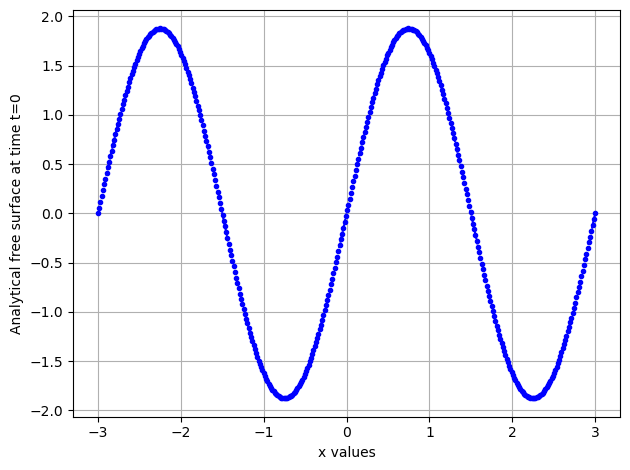

In [1303]:
plt.plot(x, eta_analytical , color='blue', linestyle=':', marker='o', markersize=3, label='Convergence')
plt.grid(True)
plt.xlabel("x values")
plt.ylabel("Analytical free surface at time t=0")
plt.tight_layout()
plt.savefig('Eta_analytical', bbox_inches='tight')

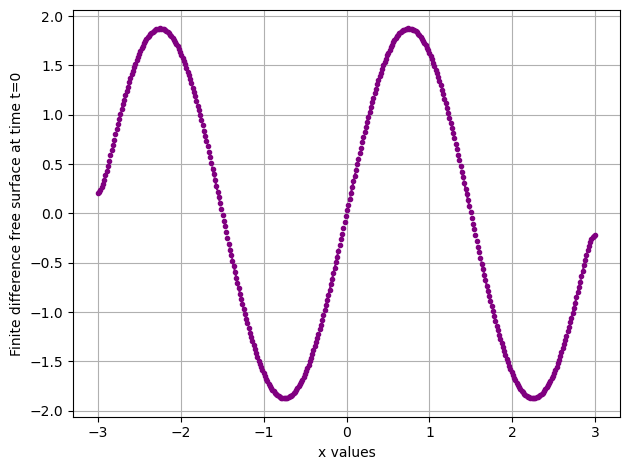

In [1304]:
plt.plot( x,eta_FD , color='purple', linestyle=':', marker='o', markersize=3, label='Convergence')
plt.grid(True)
plt.xlabel("x values")
plt.ylabel("Finite difference free surface at time t=0")
plt.tight_layout()
plt.savefig('Eta_fd', bbox_inches='tight')

In [1305]:
error_eta = np.real(-1j*(om/g)*Hat[M-1,:]) - np.real(-1j*(om/g)*P1[M-1,:])

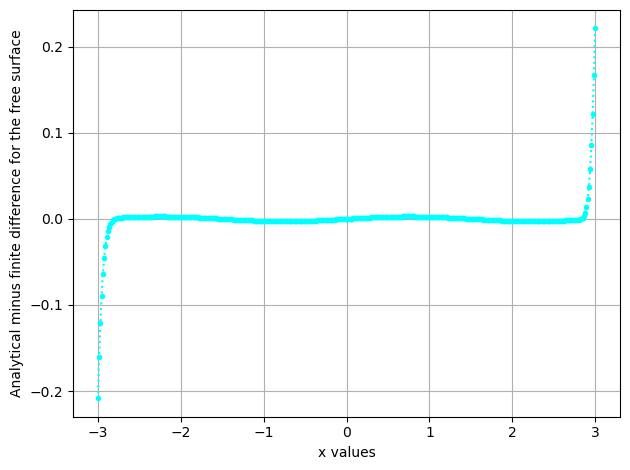

In [1306]:
plt.plot( x,error_eta , color='cyan', linestyle=':', marker='o', markersize=3, label='Convergence')
plt.grid(True)
plt.xlabel("x values")
plt.ylabel("Analytical minus finite difference for the free surface")
plt.tight_layout()
plt.savefig('Eta_error', bbox_inches='tight')